In [60]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [61]:
df = pd.read_csv("Churn_Modelling.csv")

In [62]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [64]:
#No null values
#Need to test for outliers

In [65]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [67]:
#I dont need Surname/Customer ID for my analysis
clean_df = df.drop(columns=['Surname', 'CustomerId'])
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [12]:
"""Most imp information from the above data
The average age is approximately 39 years. Older customers might have different needs and service expectations, which could influence their decision to stay with or leave a service.
Mean Tenure is around 5 years. This indicates the average duration customers stay with the company before leaving. A lower tenure could suggest dissatisfaction or a lack of engagement that leads to churn.
Mean Churn is approximately 0.20, indicating that about 20% of the customers in the dataset have exited. This rate is crucial as it sets the baseline churn rate for the company.
"""

'Most imp information from the above data\nThe average age is approximately 39 years. Older customers might have different needs and service expectations, which could influence their decision to stay with or leave a service.\nMean Tenure is around 5 years. This indicates the average duration customers stay with the company before leaving. A lower tenure could suggest dissatisfaction or a lack of engagement that leads to churn.\nMean Churn is approximately 0.20, indicating that about 20% of the customers in the dataset have exited. This rate is crucial as it sets the baseline churn rate for the company.\n'

In [68]:
clean_df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Figure size 640x480 with 0 Axes>

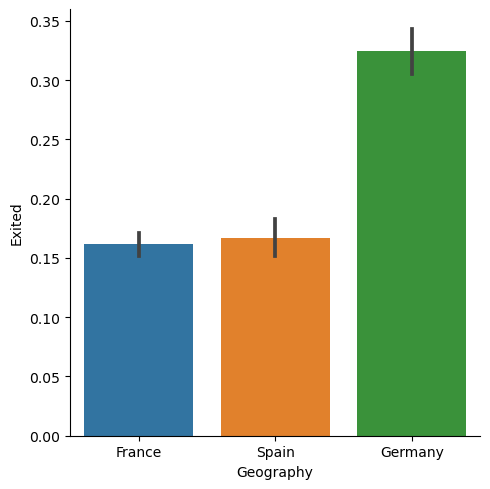

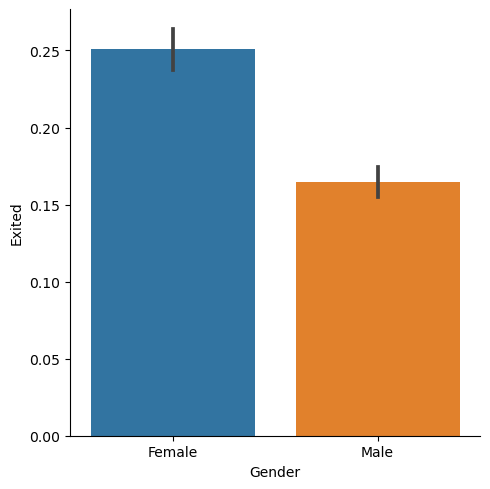

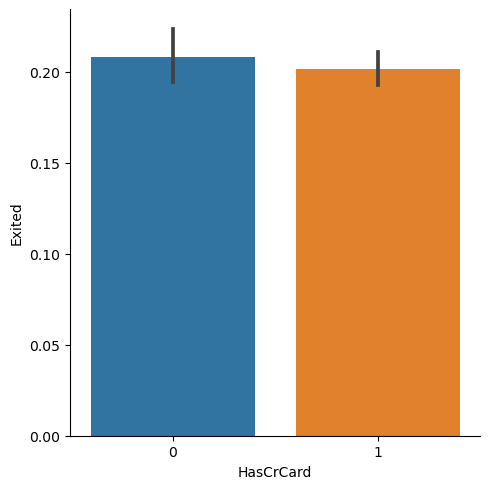

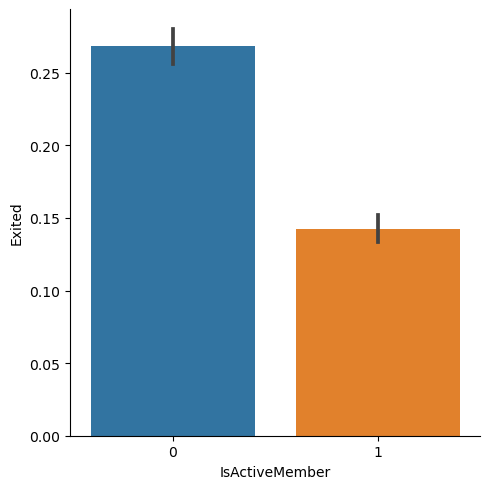

In [74]:
#Categorical Data
for i, feature in enumerate(['Geography','Gender','HasCrCard','IsActiveMember'],1):
    plt.figure(i)
    sns.catplot(x=feature, y='Exited', data=clean_df, kind='bar', )

In [15]:
#Working with Numerical/Continous Variable Analysis now
num_df=df.drop(columns=['Gender','Geography','RowNumber','HasCrCard','Exited'])

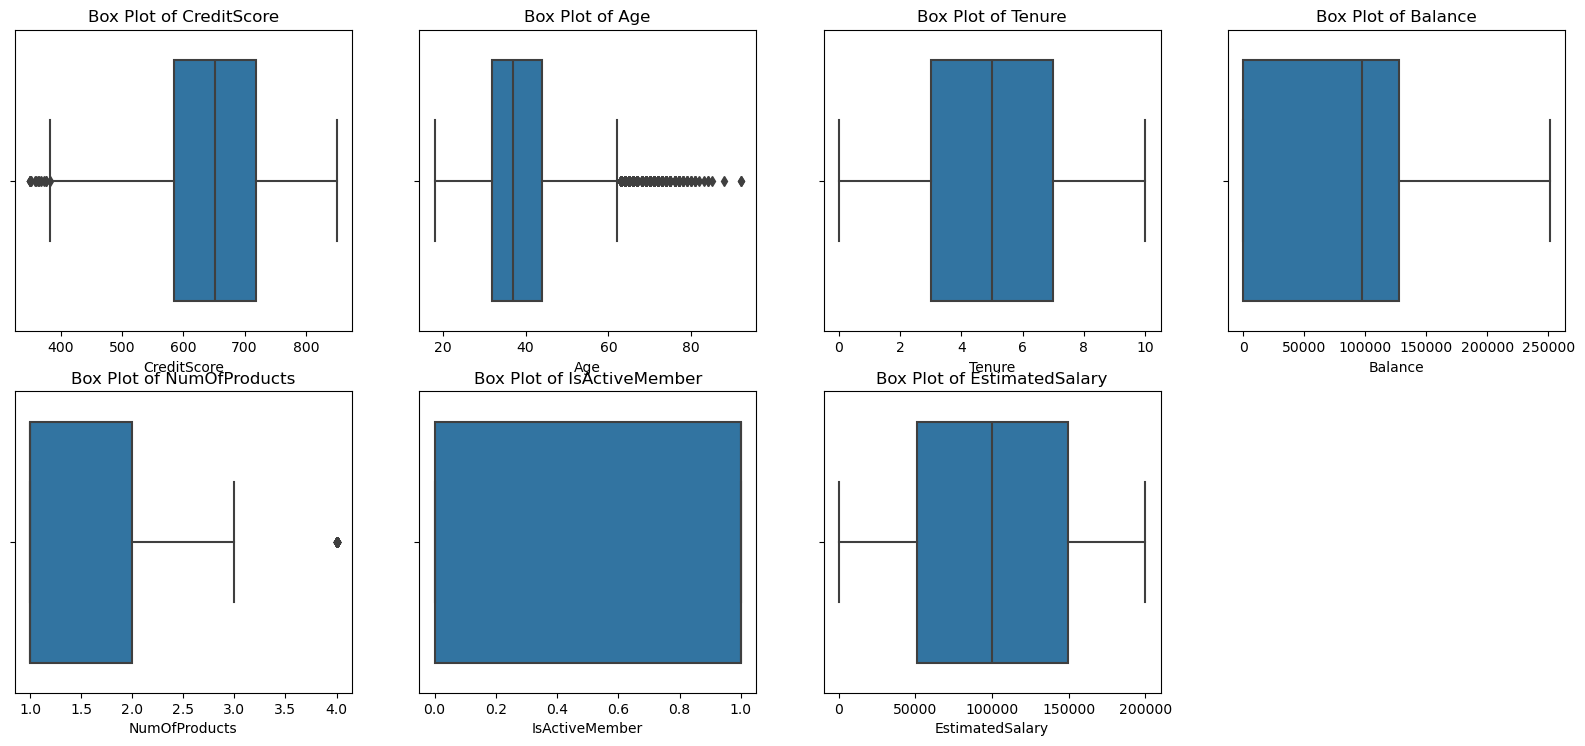

In [78]:
plt.figure(figsize=(20, 18))
for i, column in enumerate(num_df,1):
    plt.subplot(4, 4, i) 
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')

In [ ]:
"""
From the above data we can confer that the variables CreditScore, Age, and NumOfProducts exhibit clear outliers.Since, we have
Since there could be adults over age 60+, we can not just remove them from our analysis, so we will do analysis of different age groups"

C:\Users\Ayushi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ayushi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


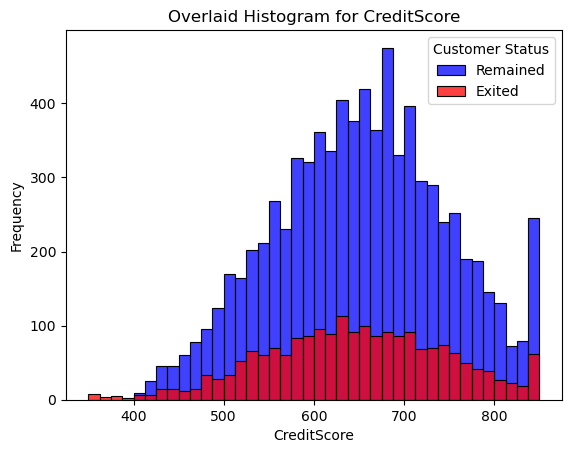

C:\Users\Ayushi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ayushi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


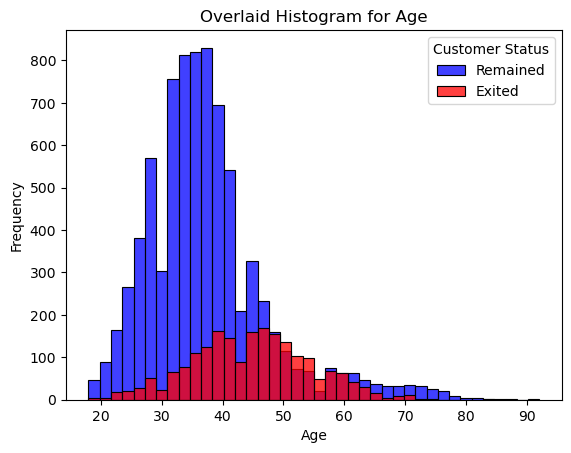

C:\Users\Ayushi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ayushi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


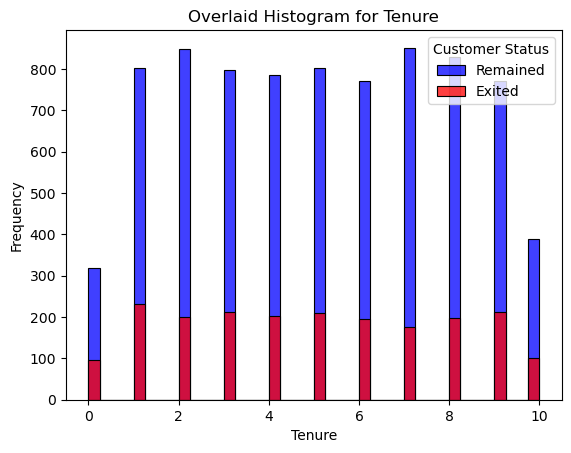

C:\Users\Ayushi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ayushi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


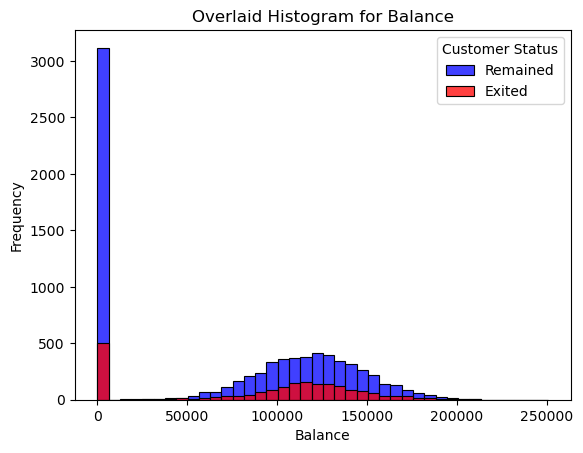

C:\Users\Ayushi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ayushi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


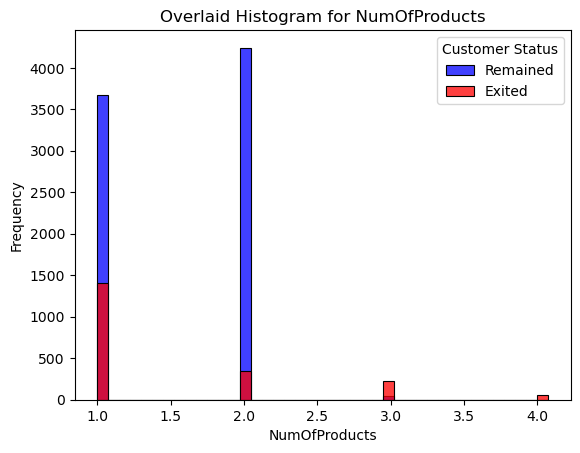

C:\Users\Ayushi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ayushi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


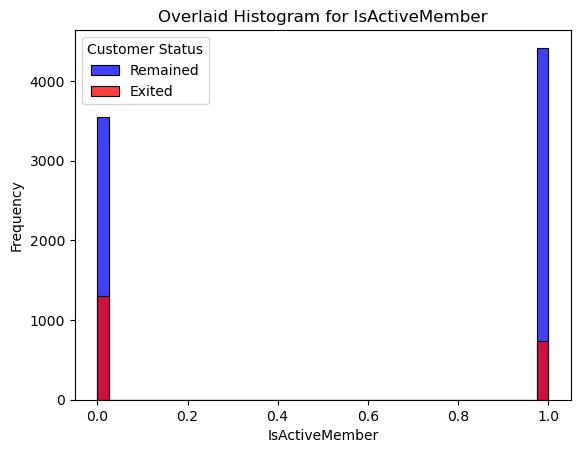

C:\Users\Ayushi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ayushi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


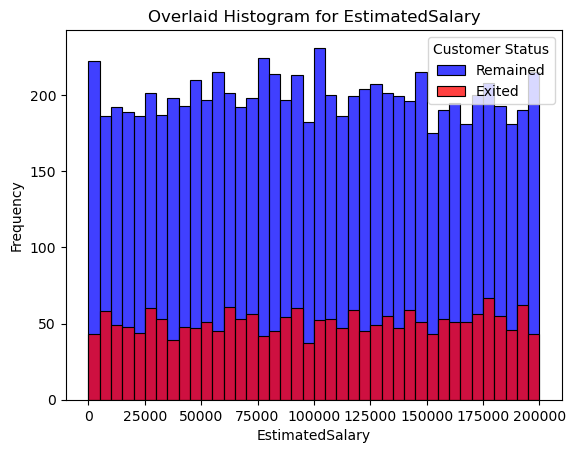

In [49]:
#Making Histograms for continuous variables
for feature in num_df:
    remained = list(df[df['Exited'] == 0][feature].dropna())
    exited = list(df[df['Exited'] == 1][feature].dropna())
    xmin = min(min(remained), min(exited))
    xmax = max(max(remained), max(exited))
    width = (xmax - xmin) / 40
     # Plot histograms with different colors for clarity.
    sns.histplot(remained, kde=False, bins=np.arange(xmin, xmax + width, width), color='blue', label='Remained')
    sns.histplot(exited, kde=False, bins=np.arange(xmin, xmax + width, width), color='red', label='Exited')

    plt.legend(title='Customer Status')
    plt.title(f'Overlaid Histogram for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [50]:
age_bins = [18, 35, 60, 100]  
age_labels = ['Young Adults', 'Middle-Aged Adults', 'Older Adults']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)  #right=False makes it 20-29 if the bin is 20-30


In [51]:
grouped_data = df.groupby('Age_Group').agg({
    'Balance': 'mean',
    'CreditScore':'mean',
    'Exited': 'mean'  # For example, churn rate
}).reset_index()

print(grouped_data)

            Age_Group       Balance  CreditScore    Exited
0        Young Adults  73865.643773   651.656157  0.078826
1  Middle-Aged Adults  78271.889905   649.539948  0.276100
2        Older Adults  75136.097795   653.538023  0.279468


C:\Users\Ayushi\AppData\Local\Temp\ipykernel_8972\425556494.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby('Age_Group').agg({


C:\Users\Ayushi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


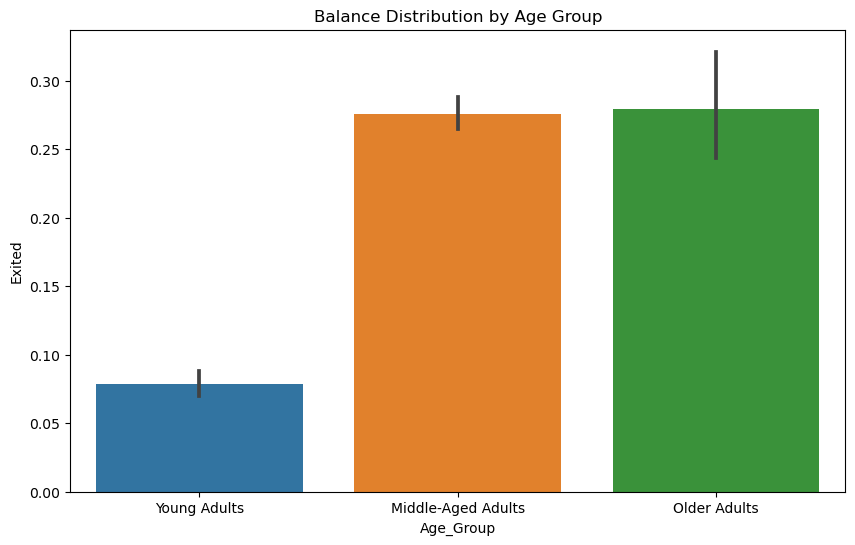

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Exited', data=df)
plt.title('Balance Distribution by Age Group')
plt.show()

In [53]:
'Young adults are less likely to leave'

'Young adults are less likely to leave'

In [73]:
#20 users most likely to leave (Predictive Analysis)

In [79]:
#: Dropping non-predictive fields and handling categorical variables
X = df.drop(['Exited', 'CustomerId', 'Surname'], axis=1)  # Assuming 'CustomerId' and 'Surname' are not predictive
X = pd.get_dummies(X)  # Convert categorical variables to dummy variables (Easier for Predictive Analysis)
y = df['Exited']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict probabilities on the test set
churn_probabilities = model.predict_proba(X_test)[:, 1]  
churn_df = pd.DataFrame({
    'CustomerID': X_test.index,  
    'ChurnProbability': churn_probabilities
})

top_20_churn = churn_df.sort_values(by='ChurnProbability', ascending=False).head(20)

print(top_20_churn)


      CustomerID  ChurnProbability
776         2614              0.97
1946        6911              0.97
1783        5137              0.96
698         8683              0.96
1731        4607              0.93
183         3898              0.93
1733         467              0.93
393         3238              0.92
728         3130              0.92
1379        5950              0.92
1394         871              0.92
1924        3616              0.91
1222         743              0.91
909         1254              0.90
1109        6255              0.90
1493        3206              0.90
1887        3639              0.90
1313        2777              0.90
1968        7018              0.89
1697        5922              0.89
